In [35]:
#!/usr/bin/python
import nltk
import numpy as np
import re
import tensorflow as tf
from nltk.tokenize import WordPunctTokenizer
from random import randint

Importing Glove and  40000 words list 

In [36]:
wordsList = np.load('wordsList.npy')
print('Loaded the word list!')
wordsList = wordsList.tolist() #Originally loaded as numpy array
wordsList = [word.decode('UTF-8') for word in wordsList] #Encode words as UTF-8
wordVectors = np.load('wordVectors.npy')
print ('Loaded the word vectors!')
print(len(wordsList))
print(wordVectors.shape)
print(wordsList[5066])
print(wordVectors[5066][:])

Loaded the word list!
Loaded the word vectors!
400000
(400000, 50)
closure
[ 0.51  0.12 -0.12 -0.21 -1.07 -0.18  0.16  0.77  0.26 -0.16  0.03 -0.65
 -0.45 -0.19  0.45  1.1   0.05 -0.37  0.17  0.28  0.85 -0.55 -1.18  0.07
 -0.59 -0.85  0.19  0.38  0.94  0.63  2.39 -0.41 -0.12  0.05 -0.42 -0.06
  1.5  -0.94 -0.16  0.8  -0.44 -0.5   0.07  0.28 -0.28 -0.01 -0.37  0.49
 -0.35  0.04]


Extract data from Affective Text a News Headlines from Google News or CNN

In [37]:
#--------------------Extracting Id && sentences from corpus
def extract(dataset):
    f = open(dataset, 'r+')
    linea = f.readline()
    _id = []
    sentences = []
    
    while linea != "":    
        #print(linea.split("#"))
        linea = linea.split("#")
        _id.append(linea[0])
        sentences.append(linea[1])
        linea = f.readline()
    f.close()
    return sentences,_id

dataset = "Affective_Text/affectivetext_trial.xml"
sentences,_id = extract(dataset)
print(_id[0]," ",sentences[0])

1   Mortar assault leaves at least 18 dead



Extracting Emotion from Affective Text dataset : {happiness, sadness, anger, disgust, surprise, and fear}

In [49]:
#--------------------Extracting the most high emotion 
def extract_emo(dataset):
    f = open(dataset, 'r+')
    linea = f.readline()
    emotions = []
    while linea != "":    
        linea = linea.split(" ")
        linea.pop(0)
        _max = linea.index(max(linea))
        emotions.append(_max)
        linea = f.readline()
    f.close()
    return emotions

dataset = "Affective_Text/affectivetext_trial.emotions.gold"
emotions = extract_emo(dataset)
print(emotions)

[4, 3, 3, 2, 5, 3, 3, 5, 3, 3, 3, 4, 3, 5, 4, 0, 3, 4, 3, 4, 3, 2, 3, 5, 0, 3, 1, 2, 5, 2, 1, 3, 3, 0, 3, 2, 0, 4, 2, 5, 4, 4, 5, 4, 4, 2, 4, 5, 2, 2, 2, 1, 0, 3, 3, 4, 5, 5, 0, 1, 2, 4, 2, 5, 3, 5, 2, 2, 4, 3, 5, 2, 0, 0, 0, 3, 1, 4, 3, 5, 1, 2, 3, 3, 3, 5, 5, 2, 0, 3, 3, 4, 3, 4, 3, 0, 2, 0, 2, 2, 0, 1, 1, 3, 3, 4, 3, 3, 3, 4, 5, 4, 1, 2, 0, 4, 0, 3, 3, 0, 5, 3, 0, 2, 0, 0, 1, 2, 3, 3, 1, 2, 5, 4, 2, 0, 0, 0, 5, 3, 3, 2, 0, 1, 3, 4, 2, 3, 5, 5, 5, 3, 3, 2, 4, 4, 4, 0, 2, 5, 5, 0, 2, 2, 2, 5, 2, 3, 3, 4, 1, 3, 3, 5, 4, 4, 3, 3, 2, 2, 5, 5, 5, 5, 1, 5, 3, 4, 3, 0, 0, 5, 0, 4, 0, 2, 4, 2, 3, 1, 3, 4, 4, 5, 4, 4, 0, 3, 2, 1, 0, 4, 4, 1, 0, 5, 0, 2, 5, 3, 5, 3, 5, 5, 3, 0, 3, 0, 2, 5, 3, 4, 3, 3, 3, 5, 3, 3, 0, 5, 3, 5, 4, 4, 5, 4, 3, 3, 2, 1]


Generalizamos las emociones {Antes: 0:anger ** 1:disgust **  2:fear **  3:joy **  4:sadness **  5:surprise Ahora: Hp: 1  ** Sad:2 **  Anger:3 **  Disgust:4 **  Sur:5 **  Fear:6}

In [50]:
def toClasses(emo):
    id_emo = []
    for e in emo:
        if e == 0:
            e = 3
        elif e == 1:
            e = 4
        elif e == 2:
            e = 6
        elif e == 3:
            e = 1
        elif e == 4:
            e = 2
        #elif e == 5:
            #e = 5          
        id_emo.append(e)
    return id_emo
emotions = toClasses(emotions)
print(emotions)
print(emotions[0]," ",sentences[0])
print(len(emotions))

[2, 1, 1, 6, 5, 1, 1, 5, 1, 1, 1, 2, 1, 5, 2, 3, 1, 2, 1, 2, 1, 6, 1, 5, 3, 1, 4, 6, 5, 6, 4, 1, 1, 3, 1, 6, 3, 2, 6, 5, 2, 2, 5, 2, 2, 6, 2, 5, 6, 6, 6, 4, 3, 1, 1, 2, 5, 5, 3, 4, 6, 2, 6, 5, 1, 5, 6, 6, 2, 1, 5, 6, 3, 3, 3, 1, 4, 2, 1, 5, 4, 6, 1, 1, 1, 5, 5, 6, 3, 1, 1, 2, 1, 2, 1, 3, 6, 3, 6, 6, 3, 4, 4, 1, 1, 2, 1, 1, 1, 2, 5, 2, 4, 6, 3, 2, 3, 1, 1, 3, 5, 1, 3, 6, 3, 3, 4, 6, 1, 1, 4, 6, 5, 2, 6, 3, 3, 3, 5, 1, 1, 6, 3, 4, 1, 2, 6, 1, 5, 5, 5, 1, 1, 6, 2, 2, 2, 3, 6, 5, 5, 3, 6, 6, 6, 5, 6, 1, 1, 2, 4, 1, 1, 5, 2, 2, 1, 1, 6, 6, 5, 5, 5, 5, 4, 5, 1, 2, 1, 3, 3, 5, 3, 2, 3, 6, 2, 6, 1, 4, 1, 2, 2, 5, 2, 2, 3, 1, 6, 4, 3, 2, 2, 4, 3, 5, 3, 6, 5, 1, 5, 1, 5, 5, 1, 3, 1, 3, 6, 5, 1, 2, 1, 1, 1, 5, 1, 1, 3, 5, 1, 5, 2, 2, 5, 2, 1, 1, 6, 4]
2   Mortar assault leaves at least 18 dead

250


Preprocesing of Sentences

In [51]:
def decontracted(phrase):
    # specific
    '''phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)'''

    if phrase == "t":
        phrase = "not"
    elif phrase == "re":
        phrase = "are"
    elif phrase == "s":
        phrase = "is"
    elif phrase == "d":
        phrase = "would"
    elif phrase == "ve":
        phrase = "have"
    elif phrase == "m":
        phrase = "am"
    elif phrase == "ca":
        phrase = "can"
    elif phrase == "isn":
        phrase = "is"
    elif phrase == "aren":
        phrase = "are"
    elif phrase == "wouldn":
        phrase = "would"

    # general
    '''phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)'''
    return phrase

In [52]:
#----------------Cleanning Sentences--------------
def cleaner(sent):
    for s in range(0,len(sent)):
        print(sent[s])
        sent[s] = sent[s].lower()
        sent[s] = WordPunctTokenizer().tokenize(sent[s])#nltk.word_tokenize(sent[s])
        #print(sent[s])
        for word in range(0,len(sent[s])):
            sent[s][word] = decontracted(sent[s][word])
            sent[s][word] = re.sub(r'[^a-zA-Z0-9\s]', ' ', sent[s][word])
            sent[s][word] = sent[s][word].strip()
            
        sent[s] = list(filter(None, sent[s])) # fastest
        print(sent[s])
        print("-----------")
    return sent

c_sent = sentences[:]    
c_sent = cleaner(c_sent)
print(c_sent[0])

Mortar assault leaves at least 18 dead

['mortar', 'assault', 'leaves', 'at', 'least', '18', 'dead']
-----------
Goal delight for Sheva

['goal', 'delight', 'for', 'sheva']
-----------
Nigeria hostage feared dead is freed

['nigeria', 'hostage', 'feared', 'dead', 'is', 'freed']
-----------
Bombers kill shoppers

['bombers', 'kill', 'shoppers']
-----------
Vegetables, not fruit, slow brain decline

['vegetables', 'not', 'fruit', 'slow', 'brain', 'decline']
-----------
PM: Havana deal a good experiment

['pm', 'havana', 'deal', 'a', 'good', 'experiment']
-----------
Kate is marrying Doherty

['kate', 'is', 'marrying', 'doherty']
-----------
NASA revisiting life on Mars question

['nasa', 'revisiting', 'life', 'on', 'mars', 'question']
-----------
Happy birthday, iPod

['happy', 'birthday', 'ipod']
-----------
Alonso would be happy to retire with three titles

['alonso', 'would', 'be', 'happy', 'to', 'retire', 'with', 'three', 'titles']
-----------
Madonna's New Tot 'Happy at Home' in Lon

Les't determine the total and average number of words in each sentences

In [53]:
def maximum(sent):
    numWords = []
    for s in sent:
        counter = len(s)
        numWords.append(counter) 
    maxLengh = int(sum(numWords)/len(numWords))
    print("Average: ", maxLengh)
    return numWords,maxLengh
numWords,maxSeqLength = maximum(c_sent)

Average:  6


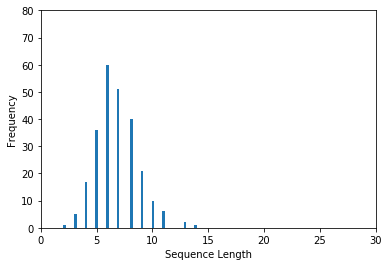

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
def histograma(numWords):
    plt.hist(numWords, 50)
    plt.xlabel('Sequence Length')
    plt.ylabel('Frequency')
    plt.axis([0, 30, 0, 80])
    plt.show()
histograma(numWords)

Converting each sentence into a vector and adding it into a matrix of 'ids'

In [55]:
def integerSenteces(sent,maximum):
    i = 0
    embbeding = 0
    matrix = np.zeros((len(sent), maximum)) #250 X 6 (numEjem X Maximun)
    for s in sent:
        vector = np.zeros((maximum), dtype='int32')
        bound = maximum
        if len(s) < maximum:
            bound = len(s)    

        for token in range(0,bound): #No encuentra macu, porque la corta
            if s[token] not in wordsList:
                vector[token] = embbeding # ???
                print(s[token],"*---*",sent[i])
            else:
                vector[token] = (wordsList.index(s[token]))
                embbeding = vector[token]
        matrix[i] = (vector)
        i += 1
    return matrix

In [44]:
X_train = integerSenteces(c_sent,maxSeqLength) 
print("Sentences integer representation: ",(X_train.shape))
print("Sentences: ",len(c_sent))
print("Integer format",X_train[249])
print("Normal format",c_sent[249])

Sentences integer representation:  (250, 6)
Sentences:  250
Integer format [  38.   32.   81. 1525. 3747.    0.]
Normal format ['who', 'are', 'you', 'calling', 'fat']


Writting the labels : Y train Labels

In [56]:
def toLabels(emo):
    classes = 6
    Y = np.zeros((len(emo), classes)) #Num Ejemplos X 6 emociones
    for e in range(0,len(emo)):
        vector = np.zeros((classes))
        vector[(emo[e] % (classes + 1)) - 1] = 1 
        Y[e] = vector
        #print(emo[e],"---",vector)
    return Y
 
Y_train = toLabels(emotions)
print("Y_train: ",Y_train.shape," Num Ejem X 6 clases")
print("X_train: ",X_train.shape," Num Ejem X Maximun Lengh")

2 --- [0. 1. 0. 0. 0. 0.]
1 --- [1. 0. 0. 0. 0. 0.]
1 --- [1. 0. 0. 0. 0. 0.]
6 --- [0. 0. 0. 0. 0. 1.]
5 --- [0. 0. 0. 0. 1. 0.]
1 --- [1. 0. 0. 0. 0. 0.]
1 --- [1. 0. 0. 0. 0. 0.]
5 --- [0. 0. 0. 0. 1. 0.]
1 --- [1. 0. 0. 0. 0. 0.]
1 --- [1. 0. 0. 0. 0. 0.]
1 --- [1. 0. 0. 0. 0. 0.]
2 --- [0. 1. 0. 0. 0. 0.]
1 --- [1. 0. 0. 0. 0. 0.]
5 --- [0. 0. 0. 0. 1. 0.]
2 --- [0. 1. 0. 0. 0. 0.]
3 --- [0. 0. 1. 0. 0. 0.]
1 --- [1. 0. 0. 0. 0. 0.]
2 --- [0. 1. 0. 0. 0. 0.]
1 --- [1. 0. 0. 0. 0. 0.]
2 --- [0. 1. 0. 0. 0. 0.]
1 --- [1. 0. 0. 0. 0. 0.]
6 --- [0. 0. 0. 0. 0. 1.]
1 --- [1. 0. 0. 0. 0. 0.]
5 --- [0. 0. 0. 0. 1. 0.]
3 --- [0. 0. 1. 0. 0. 0.]
1 --- [1. 0. 0. 0. 0. 0.]
4 --- [0. 0. 0. 1. 0. 0.]
6 --- [0. 0. 0. 0. 0. 1.]
5 --- [0. 0. 0. 0. 1. 0.]
6 --- [0. 0. 0. 0. 0. 1.]
4 --- [0. 0. 0. 1. 0. 0.]
1 --- [1. 0. 0. 0. 0. 0.]
1 --- [1. 0. 0. 0. 0. 0.]
3 --- [0. 0. 1. 0. 0. 0.]
1 --- [1. 0. 0. 0. 0. 0.]
6 --- [0. 0. 0. 0. 0. 1.]
3 --- [0. 0. 1. 0. 0. 0.]
2 --- [0. 1. 0. 0. 0. 0.]
6 --- [0. 0.

Preparing Test Data

500   Test to predict breast cancer relapse is approved

[4, 5, 5, 3, 5, 0, 5, 2, 4, 4, 5, 5, 1, 5, 0, 3, 5, 0, 4, 5, 0, 4, 1, 1, 5, 5, 3, 5, 1, 5, 4, 1, 5, 2, 3, 5, 4, 4, 3, 1, 3, 3, 4, 4, 2, 3, 0, 4, 5, 0, 0, 1, 3, 2, 4, 5, 3, 5, 2, 3, 2, 1, 1, 2, 3, 4, 3, 3, 5, 2, 0, 5, 0, 5, 2, 3, 1, 0, 2, 0, 3, 0, 2, 2, 2, 4, 3, 5, 3, 4, 2, 2, 3, 3, 5, 2, 5, 5, 2, 5, 5, 2, 5, 2, 4, 4, 5, 3, 4, 2, 5, 5, 5, 3, 3, 0, 0, 0, 3, 3, 1, 2, 2, 2, 2, 5, 5, 3, 3, 4, 2, 3, 2, 5, 2, 3, 5, 1, 5, 5, 1, 3, 3, 0, 1, 1, 0, 3, 2, 3, 5, 5, 4, 0, 3, 1, 2, 2, 2, 5, 3, 5, 5, 5, 4, 2, 3, 2, 4, 5, 5, 2, 2, 5, 4, 3, 1, 2, 4, 2, 3, 2, 3, 5, 5, 3, 1, 0, 5, 0, 4, 4, 0, 4, 3, 2, 4, 5, 1, 5, 5, 0, 3, 5, 5, 2, 2, 5, 5, 4, 4, 5, 4, 4, 3, 3, 0, 0, 5, 3, 3, 3, 3, 2, 4, 5, 4, 5, 5, 3, 3, 3, 0, 4, 2, 3, 2, 3, 0, 5, 4, 5, 4, 2, 3, 5, 3, 2, 4, 5, 3, 3, 1, 4, 4, 1, 5, 1, 5, 3, 3, 0, 0, 5, 5, 3, 4, 4, 3, 3, 0, 2, 3, 5, 4, 5, 4, 3, 5, 2, 3, 1, 5, 3, 2, 2, 2, 5, 0, 1, 2, 0, 2, 0, 5, 0, 4, 5, 1, 5, 3, 0, 0, 3, 5, 5, 4, 5, 3, 4, 3, 4, 5, 5, 

Indonesian bird flu deaths hit 61

['indonesian', 'bird', 'flu', 'deaths', 'hit', '61']
-----------
Somali refugees cut off from aid

['somali', 'refugees', 'cut', 'off', 'from', 'aid']
-----------
Microsoft downplays Vista speech-recognition hack

['microsoft', 'downplays', 'vista', 'speech', 'recognition', 'hack']
-----------
Next island hot spot: St. Lucia

['next', 'island', 'hot', 'spot', 'st', 'lucia']
-----------
Italy to hold no-show trial of Bronx GI in Iraq slay

['italy', 'to', 'hold', 'no', 'show', 'trial', 'of', 'bronx', 'gi', 'in', 'iraq', 'slay']
-----------
Rescued boys parents hail 'miracle'

['rescued', 'boys', 'parents', 'hail', 'miracle']
-----------
Canadians tracked in child porn ring

['canadians', 'tracked', 'in', 'child', 'porn', 'ring']
-----------
Teen hacks Venezuelan government Web sites

['teen', 'hacks', 'venezuelan', 'government', 'web', 'sites']
-----------
Russia plans new ICBMs, nuclear subs

['russia', 'plans', 'new', 'icbms', 'nuclear', 'subs']
----


['anna', 'nicole', 'smith', 'fans', 'mourn', 'in', 'cyberspace']
-----------
Antibiotic Ketek more dangerous than thought

['antibiotic', 'ketek', 'more', 'dangerous', 'than', 'thought']
-----------
Time to book your cruise

['time', 'to', 'book', 'your', 'cruise']
-----------
'Blazing Angels' for PS3 fails to soar

['blazing', 'angels', 'for', 'ps3', 'fails', 'to', 'soar']
-----------
North Korea aid demand stall talks

['north', 'korea', 'aid', 'demand', 'stall', 'talks']
-----------
Cartoon Network head steps down

['cartoon', 'network', 'head', 'steps', 'down']
-----------
Malaysia aggressively wooing tourists

['malaysia', 'aggressively', 'wooing', 'tourists']
-----------
Anna Nicole Smith's Bahamas home seized

['anna', 'nicole', 'smith', 'is', 'bahamas', 'home', 'seized']
-----------
Andromeda involved in galactic collision

['andromeda', 'involved', 'in', 'galactic', 'collision']
-----------
Rwanda mulling 3-kid limit for families

['rwanda', 'mulling', '3', 'kid', 'limit', 'f

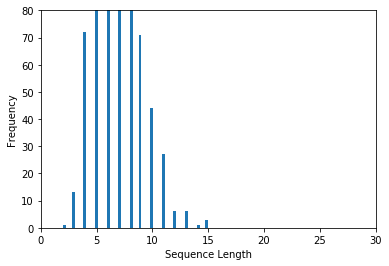

schuey *---* ['schuey', 'sees', 'ferrari', 'unveil', 'new', 'car']
bananaconda *---* ['bananaconda', 'inventor', 'is', 'top', 'poet', 'of', 'kids']
upgraders *---* ['apple', 'to', 'vista', 'upgraders', 'wait']
blissing *---* ['blissing', 'out', 'in', 'ojai']
65bn *---* ['google', 'buys', 'youtube', 'for', '1', '65bn']
pantful *---* ['scorpion', 'on', 'a', 'plane', 'a', 'pantful', 'of', 'pain']
edns *---* ['mideast', 'summit', 'edns', 'with', 'little', 'progress']
hitfactory *---* ['reopening', 'bird', 'flu', 'hitfactory', 'ignores', 'risks', 'poultryman']
revells *---* ['bruce', 'revells', 'in', 'upset']
thrillville *---* ['create', 'own', 'thrillville', 'for', 'a', 'wild', 'ride']
portege *---* ['toshiba', 'portege', 'r400']
Sentences integer representation:  (1000, 6)
Sentences:  1000
Integer format [7.28e+02 4.00e+00 6.33e+03 5.35e+03 1.65e+03 3.05e+04]
Normal format ['test', 'to', 'predict', 'breast', 'cancer', 'relapse', 'is', 'approved']
2 --- [0. 1. 0. 0. 0. 0.]
5 --- [0. 0. 0. 

5 --- [0. 0. 0. 0. 1. 0.]
3 --- [0. 0. 1. 0. 0. 0.]
1 --- [1. 0. 0. 0. 0. 0.]
6 --- [0. 0. 0. 0. 0. 1.]
1 --- [1. 0. 0. 0. 0. 0.]
2 --- [0. 1. 0. 0. 0. 0.]
2 --- [0. 1. 0. 0. 0. 0.]
1 --- [1. 0. 0. 0. 0. 0.]
5 --- [0. 0. 0. 0. 1. 0.]
5 --- [0. 0. 0. 0. 1. 0.]
4 --- [0. 0. 0. 1. 0. 0.]
1 --- [1. 0. 0. 0. 0. 0.]
5 --- [0. 0. 0. 0. 1. 0.]
5 --- [0. 0. 0. 0. 1. 0.]
2 --- [0. 1. 0. 0. 0. 0.]
6 --- [0. 0. 0. 0. 0. 1.]
5 --- [0. 0. 0. 0. 1. 0.]
1 --- [1. 0. 0. 0. 0. 0.]
1 --- [1. 0. 0. 0. 0. 0.]
1 --- [1. 0. 0. 0. 0. 0.]
6 --- [0. 0. 0. 0. 0. 1.]
1 --- [1. 0. 0. 0. 0. 0.]
4 --- [0. 0. 0. 1. 0. 0.]
1 --- [1. 0. 0. 0. 0. 0.]
6 --- [0. 0. 0. 0. 0. 1.]
6 --- [0. 0. 0. 0. 0. 1.]
5 --- [0. 0. 0. 0. 1. 0.]
3 --- [0. 0. 1. 0. 0. 0.]
2 --- [0. 1. 0. 0. 0. 0.]
2 --- [0. 1. 0. 0. 0. 0.]
2 --- [0. 1. 0. 0. 0. 0.]
5 --- [0. 0. 0. 0. 1. 0.]
5 --- [0. 0. 0. 0. 1. 0.]
1 --- [1. 0. 0. 0. 0. 0.]
6 --- [0. 0. 0. 0. 0. 1.]
2 --- [0. 1. 0. 0. 0. 0.]
5 --- [0. 0. 0. 0. 1. 0.]
1 --- [1. 0. 0. 0. 0. 0.]
1 --- [1. 0.

1 --- [1. 0. 0. 0. 0. 0.]
6 --- [0. 0. 0. 0. 0. 1.]
2 --- [0. 1. 0. 0. 0. 0.]
1 --- [1. 0. 0. 0. 0. 0.]
1 --- [1. 0. 0. 0. 0. 0.]
5 --- [0. 0. 0. 0. 1. 0.]
5 --- [0. 0. 0. 0. 1. 0.]
6 --- [0. 0. 0. 0. 0. 1.]
1 --- [1. 0. 0. 0. 0. 0.]
1 --- [1. 0. 0. 0. 0. 0.]
5 --- [0. 0. 0. 0. 1. 0.]
6 --- [0. 0. 0. 0. 0. 1.]
4 --- [0. 0. 0. 1. 0. 0.]
6 --- [0. 0. 0. 0. 0. 1.]
5 --- [0. 0. 0. 0. 1. 0.]
1 --- [1. 0. 0. 0. 0. 0.]
3 --- [0. 0. 1. 0. 0. 0.]
4 --- [0. 0. 0. 1. 0. 0.]
2 --- [0. 1. 0. 0. 0. 0.]
6 --- [0. 0. 0. 0. 0. 1.]
2 --- [0. 1. 0. 0. 0. 0.]
2 --- [0. 1. 0. 0. 0. 0.]
5 --- [0. 0. 0. 0. 1. 0.]
2 --- [0. 1. 0. 0. 0. 0.]
6 --- [0. 0. 0. 0. 0. 1.]
3 --- [0. 0. 1. 0. 0. 0.]
2 --- [0. 1. 0. 0. 0. 0.]
2 --- [0. 1. 0. 0. 0. 0.]
1 --- [1. 0. 0. 0. 0. 0.]
5 --- [0. 0. 0. 0. 1. 0.]
2 --- [0. 1. 0. 0. 0. 0.]
2 --- [0. 1. 0. 0. 0. 0.]
5 --- [0. 0. 0. 0. 1. 0.]
5 --- [0. 0. 0. 0. 1. 0.]
4 --- [0. 0. 0. 1. 0. 0.]
Y_train:  (1000, 6)  Num Ejem X 6 clases
X_train:  (1000, 6)  Num Ejem X Maximun Lengh


In [57]:
#Separamos Sentences && ids
dataset = "Affective_Text/affectivetext_test.xml"
sent_test , id_test = extract(dataset)
print(id_test[0]," ",sent_test[0])

#Escogemos the most hight emotion
dataset = "Affective_Text/affectivetext_test.emotions.gold"
test_emotions = extract_emo(dataset)
print(test_emotions)
#Generalizamos esas emociones para el Heterogenious Dataset
test_emotions = toClasses(test_emotions)

print(test_emotions)

#Limpiamos las Sentences
c_sent_test = sent_test[:]    
c_sent_test = cleaner(c_sent_test)
print(c_sent_test[0])

#Calculamos la oracion promedio
test_numWords,test_maxSeqLength = maximum(c_sent_test)
histograma(test_numWords)

#Convertimos Sentences a su representacion en Integers
X_test = integerSenteces(c_sent_test,test_maxSeqLength) 
print("Sentences integer representation: ",(X_test.shape))
print("Sentences: ",len(c_sent_test))
print("Integer format",X_test[0])
print("Normal format",c_sent_test[0])

#Transformamos cada emocion {1,2,3,4,5} a one-hot vectors
Y_test = toLabels(test_emotions)
print("Y_train: ",Y_test.shape," Num Ejem X 6 clases")
print("X_train: ",X_test.shape," Num Ejem X Maximun Lengh")

RNN Model

In [58]:
batchSize = 50 #Tiene que ser multiplo del NumEjem
lstmUnits = 64
numClasses = 6

Declarando placeholders para los labels (5 emotions) && data imput

In [59]:
import tensorflow as tf
tf.reset_default_graph()
numDimensions = 300 

#labels = tf.placeholder(tf.float32, [batchSize, numClasses])
#input_data = tf.placeholder(tf.int32, [batchSize, maxSeqLength])
labels = tf.placeholder(tf.float32, [None, numClasses])
input_data = tf.placeholder(tf.int32, [None, maxSeqLength])

Embeddings: Le damos el formato a nuestra data, aún no compilamos nada, solo declaramos

In [60]:
data = tf.Variable(tf.zeros([batchSize, maxSeqLength, numDimensions]),dtype=tf.float32)
data = tf.nn.embedding_lookup(wordVectors,input_data)

LSTM Model

In [61]:
lstmCell = tf.contrib.rnn.BasicLSTMCell(lstmUnits)
lstmCell = tf.contrib.rnn.DropoutWrapper(cell=lstmCell, output_keep_prob=0.75)
value, _ = tf.nn.dynamic_rnn(lstmCell, data, dtype=tf.float32)

In [62]:
weight = tf.Variable(tf.truncated_normal([lstmUnits, numClasses]))
bias = tf.Variable(tf.constant(0.1, shape=[numClasses]))
value = tf.transpose(value, [1, 0, 2])
last = tf.gather(value, int(value.get_shape()[0]) - 1)
prediction = (tf.matmul(last, weight) + bias)

In [63]:
correctPred = tf.equal(tf.argmax(prediction,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))

In [64]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=prediction, labels=labels))
optimizer = tf.train.AdamOptimizer().minimize(loss)

C:\Users\danie\Anaconda3\envs\Compositor\lib\site-packages\tensorflow\python\ops\gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Tensorboar

In [65]:
import datetime
def board(sess):
    tf.summary.scalar('Loss', loss)
    tf.summary.scalar('Accuracy', accuracy)
    tf.summary.histogram("Histogrma/hAccu", accuracy)
    merged = tf.summary.merge_all()
    logdir = "board/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "/"
    writer = tf.summary.FileWriter(logdir, sess.graph)
    return merged,writer

Confusion Matrix Plot

In [66]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [67]:
# Initializing the variables
init = tf.global_variables_initializer()
display_step = 10
numEjemplos = 250
iterations = 10

Epoch: 0001 cost= 2.052717566  accuracy= 30.000001192
Optimization Finished!
Accuracy: 0.296
Test Samples, Class Predictions: 
(1000,)
Test Samples, Class Truth Labels: 
(1000, 6)
Test Samples: 
(1000,)
[[139  23  23   3  43  25]
 [ 42  47  19   2  20  36]
 [ 32   6  23   4  10  28]
 [ 21  10  12   4  17  20]
 [ 95  24  14   7  35  44]
 [ 47  27  17   8  19  54]]
Precision:  [0.37 0.34 0.21 0.14 0.24 0.26]
Recall:  [0.54 0.28 0.22 0.05 0.16 0.31]
F1:  [0.44 0.31 0.22 0.07 0.19 0.28]
Confusion matrix, without normalization
[[139  23  23   3  43  25]
 [ 42  47  19   2  20  36]
 [ 32   6  23   4  10  28]
 [ 21  10  12   4  17  20]
 [ 95  24  14   7  35  44]
 [ 47  27  17   8  19  54]]
Normalized confusion matrix
[[0.54 0.09 0.09 0.01 0.17 0.1 ]
 [0.25 0.28 0.11 0.01 0.12 0.22]
 [0.31 0.06 0.22 0.04 0.1  0.27]
 [0.25 0.12 0.14 0.05 0.2  0.24]
 [0.43 0.11 0.06 0.03 0.16 0.2 ]
 [0.27 0.16 0.1  0.05 0.11 0.31]]


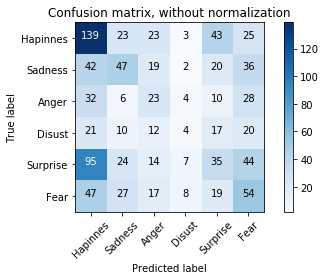

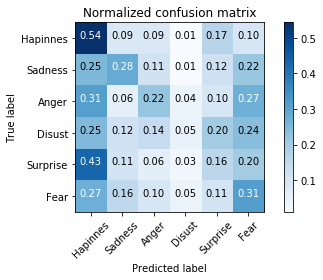

In [68]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    #Calling tensorboard function
    #---merged,writer = board(sess)
    
    # Training cycle
    for epoch in range(iterations):
        avg_cost = 0.
        total_batch = int(numEjemplos/batchSize)
        
        #Create X groups of (50,5) Labels && (50,maximum) Examples
        X_batches = np.array_split(X_train, total_batch)
        Y_batches = np.array_split(Y_train, total_batch)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = X_batches[i], Y_batches[i]
            #print("X: ",batch_x.shape)
            #print("Y: ",batch_y.shape)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c , accu= sess.run([optimizer, loss, accuracy], feed_dict={input_data: batch_x,
                                                          labels: batch_y})
            # Compute average loss
            avg_cost += c / total_batch

            #Write summary to Tensorboard
            '''if (epoch % 10 == 0):
                summary = sess.run(merged, {input_data: batch_x, labels: batch_y})
                writer.add_summary(summary, epoch)'''
            

            #Save the network every 10,000 training iterations
            #if (i % 10000 == 0 and i != 0):
                # save_path = saver.save(sess, "models/pretrained_lstm.ckpt", global_step=i)
                 # print("saved to %s" % save_path)
            #writer.close()

        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost)," accuracy=", "{:.9f}".format(accu*100))
    print("Optimization Finished!")
    
    #Test Model LSTM  
    correctPred = tf.equal(tf.argmax(prediction,1), tf.argmax(labels,1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correctPred, "float"))
    print("Accuracy:", accuracy.eval({input_data: X_test, labels: Y_test}))
    
    #Matriz de confusion

    print("Test Samples, Class Predictions: ")
    result = tf.argmax(prediction , 1).eval({input_data: X_test, labels: Y_test})
    print(result.shape)
    
    print("Test Samples, Class Truth Labels: ")
    print(Y_test.shape)
    
    print("Test Samples: ")
    test = (tf.argmax(Y_test , 1).eval()) #Convierte de [0,0,1,0,0] a [2] y lo hace np.array
    print(test.shape)
      

    from sklearn.metrics import confusion_matrix
    y_true = test
    y_pred = result
    print(confusion_matrix(y_true, y_pred))
    class_names = ["Hapinnes","Sadness","Anger","Disust","Surprise","Fear"]
    
    from sklearn.metrics import precision_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import recall_score
    print("Precision: ",precision_score(y_true, y_pred, average=None))
    print("Recall: ",recall_score(y_true, y_pred, average=None))
    print("F1: ",f1_score(y_true, y_pred, average=None))

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_true, y_pred)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')

    plt.show()


In [69]:
#Exporting For Heterogenious Dataset
print(len(sentences))
print(len(emotions))
print(len(sent_test))
print(len(test_emotions))
file = open("AffectHetero.txt","w") 

def writeDataset(emotions,sentences):
    global file
    for i in range(0,len(emotions)):
        linea = str(emotions[i]) + '#' + sentences[i]
        file.write(linea) 


250
250
1000
1000


In [70]:
writeDataset(emotions,sentences)
writeDataset(test_emotions,sent_test)
file.close() 